In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LogisticRegression 

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              RandomForestClassifier,
                              RandomForestRegressor)

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import log_loss, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as OHE  #OneHotEncoder from sklearn.preprocessing.

from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence, plot_partial_dependence

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('data\Train.zip')

c:\users\owner\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [4]:
pd.set_option("display.max_columns", 200)


In [5]:
data = df.sample(frac=0.05, replace=False, random_state=1)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
175438,1605660,24000,1224296,4699,132,1.0,1989,NaN,NaN,2/17/2009 0:00,544E,544,E,NaN,NaN,NaN,Wheel Loader - 100.0 to 110.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5054,1156269,33000,322992,4116,121,3.0,2002,4325.0,Medium,8/25/2011 0:00,D5G,D5,G,NaN,NaN,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",West Virginia,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
264034,1800071,10500,1328142,9551,132,1.0,2002,1094.0,Medium,6/20/2007 0:00,763,763,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Maryland,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351477,2414709,31000,1258921,23737,136,1.0,1993,0.0,NaN,3/19/2009 0:00,PC200LC6L,PC200,LC,6,L,Large / Medium,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",Tennessee,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 8""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
246436,1757335,10300,1088829,166,132,9.0,1000,NaN,NaN,8/30/2000 0:00,D21P-6,D21,P,-6,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",South Carolina,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   20056 non-null  int64  
 1   SalePrice                 20056 non-null  int64  
 2   MachineID                 20056 non-null  int64  
 3   ModelID                   20056 non-null  int64  
 4   datasource                20056 non-null  int64  
 5   auctioneerID              19044 non-null  float64
 6   YearMade                  20056 non-null  int64  
 7   MachineHoursCurrentMeter  7079 non-null   float64
 8   UsageBand                 3514 non-null   object 
 9   saledate                  20056 non-null  object 
 10  fiModelDesc               20056 non-null  object 
 11  fiBaseModel               20056 non-null  object 
 12  fiSecondaryDesc           13264 non-null  object 
 13  fiModelSeries             2861 non-null   object 
 14  

In [7]:
data.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                 1012
YearMade                        0
MachineHoursCurrentMeter    12977
UsageBand                   16542
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              6792
fiModelSeries               17195
fiModelDescriptor           16369
ProductSize                 10498
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                14840
Enclosure                      17
Forks                       10510
Pad_Type                    16099
Ride_Control                12605
Stick                       16099
Transmission                10844
Turbocharged                16099
Blade_Extension             18798
Blade_Width   

In [8]:
data.YearMade.describe()

count    20056.000000
mean      1901.337605
std        288.673338
min       1000.000000
25%       1984.000000
50%       1995.000000
75%       2000.000000
max       2011.000000
Name: YearMade, dtype: float64

year is as early as 1000, this is not reasonable. can use df.clip to trim it.

<AxesSubplot:>

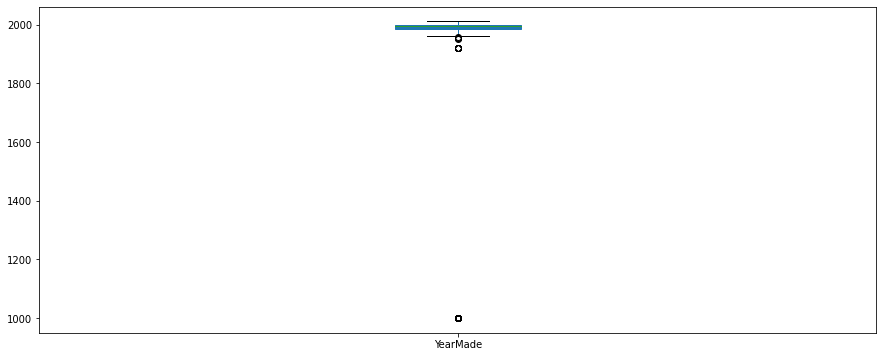

In [9]:
data.iloc[:,6:7].plot(kind='box', vert=True, patch_artist=True, figsize=(15,6))

We can see outliers for 'YearMade' as 1000. 

In [10]:
data.YearMade.clip(1900,2020,inplace=True)

In [11]:
data.YearMade.describe()

count    20056.000000
mean      1984.983396
std         28.750328
min       1900.000000
25%       1984.000000
50%       1995.000000
75%       2000.000000
max       2011.000000
Name: YearMade, dtype: float64

<AxesSubplot:>

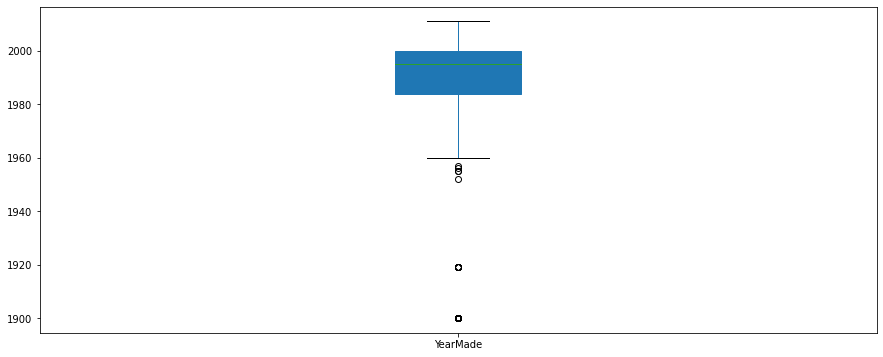

In [12]:
data.iloc[:,6:7].plot(kind='box', vert=True, patch_artist=True, figsize=(15,6))

In [13]:
data.saledate.unique()

array(['2/17/2009 0:00', '8/25/2011 0:00', '6/20/2007 0:00', ...,
       '10/21/1989 0:00', '3/16/1996 0:00', '3/19/1999 0:00'],
      dtype=object)

Too many unique values, need to change to year only, and create a new column 'saleyear', drop 'saledate'.

In [14]:
data['saleyear'] = pd.to_datetime(data['saledate']).dt.year
data.drop('saledate', axis = 1, inplace = True)

In [15]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
175438,1605660,24000,1224296,4699,132,1.0,1989,NaN,NaN,544E,544,E,NaN,NaN,NaN,Wheel Loader - 100.0 to 110.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2009
5054,1156269,33000,322992,4116,121,3.0,2002,4325.0,Medium,D5G,D5,G,NaN,NaN,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",West Virginia,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011
264034,1800071,10500,1328142,9551,132,1.0,2002,1094.0,Medium,763,763,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Maryland,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
351477,2414709,31000,1258921,23737,136,1.0,1993,0.0,NaN,PC200LC6L,PC200,LC,6,L,Large / Medium,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",Tennessee,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 8""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2009
246436,1757335,10300,1088829,166,132,9.0,1900,NaN,NaN,D21P-6,D21,P,-6,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",South Carolina,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   20056 non-null  int64  
 1   SalePrice                 20056 non-null  int64  
 2   MachineID                 20056 non-null  int64  
 3   ModelID                   20056 non-null  int64  
 4   datasource                20056 non-null  int64  
 5   auctioneerID              19044 non-null  float64
 6   YearMade                  20056 non-null  int64  
 7   MachineHoursCurrentMeter  7079 non-null   float64
 8   UsageBand                 3514 non-null   object 
 9   fiModelDesc               20056 non-null  object 
 10  fiBaseModel               20056 non-null  object 
 11  fiSecondaryDesc           13264 non-null  object 
 12  fiModelSeries             2861 non-null   object 
 13  fiModelDescriptor         3687 non-null   object 
 14  

saleyear is now int64.

In [17]:
# Converting strings to categories, but why set as_ordered? Are those categories ordered by nature? Don't think so.
# Here I will change it to as_unordered()
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_unordered()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   20056 non-null  int64   
 1   SalePrice                 20056 non-null  int64   
 2   MachineID                 20056 non-null  int64   
 3   ModelID                   20056 non-null  int64   
 4   datasource                20056 non-null  int64   
 5   auctioneerID              19044 non-null  float64 
 6   YearMade                  20056 non-null  int64   
 7   MachineHoursCurrentMeter  7079 non-null   float64 
 8   UsageBand                 3514 non-null   category
 9   fiModelDesc               20056 non-null  category
 10  fiBaseModel               20056 non-null  category
 11  fiSecondaryDesc           13264 non-null  category
 12  fiModelSeries             2861 non-null   category
 13  fiModelDescriptor         3687 non-null 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   20056 non-null  int64   
 1   SalePrice                 20056 non-null  int64   
 2   MachineID                 20056 non-null  int64   
 3   ModelID                   20056 non-null  int64   
 4   datasource                20056 non-null  int64   
 5   auctioneerID              19044 non-null  float64 
 6   YearMade                  20056 non-null  int64   
 7   MachineHoursCurrentMeter  7079 non-null   float64 
 8   UsageBand                 3514 non-null   category
 9   fiModelDesc               20056 non-null  category
 10  fiBaseModel               20056 non-null  category
 11  fiSecondaryDesc           13264 non-null  category
 12  fiModelSeries             2861 non-null   category
 13  fiModelDescriptor         3687 non-null 

In [20]:
# Check for which numeric columns have null values
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [21]:
# Check the numeric columns and fill with median or mean
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column to tell if the data was missing or not. I will not use this
            # data[label + '_is_missing'] = pd.isnull(content)
            
            # Fill the missing values with median, I will use mean()
            data[label] = content.fillna(content.mean())

In [22]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
175438,1605660,24000,1224296,4699,132,1.0,1989,3245.661252,NaN,544E,544,E,NaN,NaN,NaN,Wheel Loader - 100.0 to 110.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2009
5054,1156269,33000,322992,4116,121,3.0,2002,4325.000000,Medium,D5G,D5,G,NaN,NaN,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",West Virginia,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011
264034,1800071,10500,1328142,9551,132,1.0,2002,1094.000000,Medium,763,763,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Maryland,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
351477,2414709,31000,1258921,23737,136,1.0,1993,0.000000,NaN,PC200LC6L,PC200,LC,6,L,Large / Medium,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",Tennessee,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 8""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2009
246436,1757335,10300,1088829,166,132,9.0,1900,3245.661252,NaN,D21P-6,D21,P,-6,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",South Carolina,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2000


In [23]:
# Columns which aren't numeric
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
# Turn the categorical variables into numbers
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to check missing value
        # data[label + '_is_missing'] = pd.isnull(content)
        
        # Add +1 because pandas encodes the missing categories as -1
        data[label] = pd.Categorical(content).codes + 1

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   20056 non-null  int64  
 1   SalePrice                 20056 non-null  int64  
 2   MachineID                 20056 non-null  int64  
 3   ModelID                   20056 non-null  int64  
 4   datasource                20056 non-null  int64  
 5   auctioneerID              20056 non-null  float64
 6   YearMade                  20056 non-null  int64  
 7   MachineHoursCurrentMeter  20056 non-null  float64
 8   UsageBand                 20056 non-null  int8   
 9   fiModelDesc               20056 non-null  int16  
 10  fiBaseModel               20056 non-null  int16  
 11  fiSecondaryDesc           20056 non-null  int8   
 12  fiModelSeries             20056 non-null  int8   
 13  fiModelDescriptor         20056 non-null  int8   
 14  

In [26]:
data.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
175438,1605660,24000,1224296,4699,132,1.0,1989,3245.661252,0,529,214,23,0,0,0,54,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2009
5054,1156269,33000,322992,4116,121,3.0,2002,4325.000000,3,1247,467,28,0,0,0,51,50,5,5,0,4,0,0,0,0,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2011
264034,1800071,10500,1328142,9551,132,1.0,2002,1094.000000,3,785,287,0,0,0,0,36,20,3,3,0,4,1,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2007
351477,2414709,31000,1258921,23737,136,1.0,1993,0.000000,0,1885,816,37,55,31,3,11,43,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,21,2,2,1,0,0,0,0,0,2009
246436,1757335,10300,1088829,166,132,9.0,1900,3245.661252,0,1128,454,54,33,0,0,48,41,5,5,0,4,0,0,0,0,6,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2000
229555,1721625,27500,1431501,2160,132,1.0,2004,3783.000000,3,2102,923,0,0,32,3,17,28,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,22,3,2,1,0,0,0,0,0,2009
33078,1266850,40000,1154806,3259,132,1.0,1995,3245.661252,0,925,342,12,0,0,3,17,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,22,3,2,1,0,0,0,0,0,1999
393383,6262609,13000,1909812,7013,149,1.0,1980,3245.661252,0,179,84,0,0,0,3,20,5,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,22,3,2,1,0,0,0,0,0,2011
232407,1727377,68000,1062099,9118,132,4.0,1985,3245.661252,0,2323,1067,0,0,0,4,61,9,6,6,0,3,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,10,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1990
376812,2744270,24500,1932110,17976,149,2.0,2006,1152.000000,2,2220,1020,12,0,0,0,1,44,1,1,4,4,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010


In [27]:
data.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

Will only drop 'SalesID' and 'datasource', not others. 'MachineID': one machine maybe sold several times. 'ModelID' will affect price. 'saledate', 'auctioneerID', 'datasource', and 'state' all have more or less a little impact on the price.

In [28]:
X = data.drop(['SalePrice','SalesID'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20056 entries, 175438 to 179115
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MachineID                 20056 non-null  int64  
 1   ModelID                   20056 non-null  int64  
 2   datasource                20056 non-null  int64  
 3   auctioneerID              20056 non-null  float64
 4   YearMade                  20056 non-null  int64  
 5   MachineHoursCurrentMeter  20056 non-null  float64
 6   UsageBand                 20056 non-null  int8   
 7   fiModelDesc               20056 non-null  int16  
 8   fiBaseModel               20056 non-null  int16  
 9   fiSecondaryDesc           20056 non-null  int8   
 10  fiModelSeries             20056 non-null  int8   
 11  fiModelDescriptor         20056 non-null  int8   
 12  ProductSize               20056 non-null  int8   
 13  fiProductClassDesc        20056 non-null  int8   
 14  

In [29]:
X.head()

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
175438,1224296,4699,132,1.0,1989,3245.661252,0,529,214,23,0,0,0,54,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2009
5054,322992,4116,121,3.0,2002,4325.000000,3,1247,467,28,0,0,0,51,50,5,5,0,4,0,0,0,0,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2011
264034,1328142,9551,132,1.0,2002,1094.000000,3,785,287,0,0,0,0,36,20,3,3,0,4,1,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2007
351477,1258921,23737,136,1.0,1993,0.000000,0,1885,816,37,55,31,3,11,43,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,21,2,2,1,0,0,0,0,0,2009
246436,1088829,166,132,9.0,1900,3245.661252,0,1128,454,54,33,0,0,48,41,5,5,0,4,0,0,0,0,6,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2000


In [30]:
y = np.log(data['SalePrice'])
y

175438    10.085809
5054      10.404263
264034     9.259131
351477    10.341742
246436     9.239899
            ...    
359071    11.537618
238550     8.987197
61230     11.119883
336782    10.085809
179115    10.621327
Name: SalePrice, Length: 20056, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
267339,1191405,9563,132,1.0,1996,3245.661252,0,893,324,0,0,0,0,38,20,3,3,0,4,1,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2000
335439,1711488,4604,136,1.0,1999,0.000000,0,273,128,23,0,0,0,2,5,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008
76806,1217372,4146,132,4.0,1962,3245.661252,0,1345,481,29,0,0,2,49,9,5,5,0,4,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,5,0,0,1996
12015,1023525,3170,121,3.0,1900,200.000000,2,583,227,35,0,0,0,2,4,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008
201462,1518787,4605,132,1.0,2003,3245.661252,0,274,128,28,0,0,0,2,44,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200927,1494188,4764,132,1.0,2002,3245.661252,0,651,246,29,0,0,0,51,9,5,5,0,4,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2008
72192,1302784,1355,132,1.0,1997,3245.661252,0,367,154,0,0,31,3,22,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,22,3,2,1,0,0,0,0,0,2007
221079,1395892,15310,132,27.0,2005,6321.000000,1,2401,1111,0,0,32,3,17,33,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,14,22,3,2,1,0,0,0,0,0,2009
380114,2304396,1597,172,1.0,1998,0.000000,0,1258,467,45,0,68,4,44,44,5,5,0,3,0,0,0,0,8,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,3,0,0,2011


In [32]:
X_train

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
267339,1191405,9563,132,1.0,1996,3245.661252,0,893,324,0,0,0,0,38,20,3,3,0,4,1,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2000
335439,1711488,4604,136,1.0,1999,0.000000,0,273,128,23,0,0,0,2,5,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008
76806,1217372,4146,132,4.0,1962,3245.661252,0,1345,481,29,0,0,2,49,9,5,5,0,4,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,5,0,0,1996
12015,1023525,3170,121,3.0,1900,200.000000,2,583,227,35,0,0,0,2,4,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008
201462,1518787,4605,132,1.0,2003,3245.661252,0,274,128,28,0,0,0,2,44,1,1,4,4,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200927,1494188,4764,132,1.0,2002,3245.661252,0,651,246,29,0,0,0,51,9,5,5,0,4,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,2008
72192,1302784,1355,132,1.0,1997,3245.661252,0,367,154,0,0,31,3,22,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,22,3,2,1,0,0,0,0,0,2007
221079,1395892,15310,132,27.0,2005,6321.000000,1,2401,1111,0,0,32,3,17,33,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,14,22,3,2,1,0,0,0,0,0,2009
380114,2304396,1597,172,1.0,1998,0.000000,0,1258,467,45,0,68,4,44,44,5,5,0,3,0,0,0,0,8,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,3,0,0,2011


In [33]:
# test to see if the cleaned data works for building a model
gdbr_test = GradientBoostingRegressor()
gdbr_test.fit(X_train, y_train)

GradientBoostingRegressor()

In [34]:
print("score:", gdbr_test.score(X_test, y_test))

score: 0.7980941295968073


In [40]:
# build three models with preset parameters(mostly default): Rain Forest, Gradient Boosting, Decision Tree, and compare which is better
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=300,
                                  random_state=1)

dtr = DecisionTreeRegressor(random_state=1)

In [41]:
def cross_val(estimator, X_train, y_train, nfolds):
    ''' Takes an instantiated model (estimator) and returns the average
        mean square error (mse) and coefficient of determination (r2) from
        kfold cross-validation.

        Parameters: estimator: model object
                    X_train: 2d numpy array
                    y_train: 1d numpy array
                    nfolds: the number of folds in the kfold cross-validation

        Returns:  mse: average mean_square_error of model over number of folds
                  r2: average coefficient of determination over number of folds
    
        There are many possible values for scoring parameter in cross_val_score.
        http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

        kfold is easily parallelizable, so set n_jobs = -1 in cross_val_score
    '''
    mse = cross_val_score(estimator, X_train, y_train, 
                          scoring='neg_mean_squared_error',
                          cv=nfolds, n_jobs=-1) * -1
    # mse multiplied by -1 to make positive
    r2 = cross_val_score(estimator, X_train, y_train, 
                         scoring='r2', cv=nfolds, n_jobs=-1)
    mean_mse = mse.mean()
    mean_r2 = r2.mean()
    name = estimator.__class__.__name__
    print("{0:<25s} Train CV | MSE: {1:0.3f} | R2: {2:0.3f}".format(name,
                                                        mean_mse, mean_r2))
    return mean_mse, mean_r2


In [42]:
k = 10 # number of folds in the cross-validation
#cross_val() comes from individual_soln.py
cross_val(rf, X_train, y_train, k) 
cross_val(gdbr, X_train, y_train, k) 
cross_val(dtr, X_train, y_train, k); 

RandomForestRegressor     Train CV | MSE: 0.074 | R2: 0.847
GradientBoostingRegressor Train CV | MSE: 0.077 | R2: 0.839
DecisionTreeRegressor     Train CV | MSE: 0.147 | R2: 0.694


Looks Random Forest gives the best result. Will do grid search to find optimal parameters for GDBR.

In [43]:
def stage_score_plot(estimator, ax, X_train, y_train, X_test, y_test):
    '''
        Parameters: estimator: GradientBoostingRegressor
                    X_train: 2d numpy array
                    y_train: 1d numpy array
                    X_test: 2d numpy array
                    y_test: 1d numpy array

        Returns: A plot of the number of iterations vs the MSE for the model for
        both the training set and test set.
    '''
    estimator.fit(X_train, y_train)
    
    # initialize 
    train_scores = np.zeros((estimator.n_estimators,), dtype=np.float64)
    test_scores = np.zeros((estimator.n_estimators,), dtype=np.float64)
    
    # Get train score from each boost
    for i, y_train_pred in enumerate(estimator.staged_predict(X_train)):
        train_scores[i] = mean_squared_error(y_train, y_train_pred)
        
    # Get test score from each boost
    for i, y_test_pred in enumerate(estimator.staged_predict(X_test)):
        test_scores[i] = mean_squared_error(y_test, y_test_pred)
    
    ax.plot(train_scores, label=f"{estimator.__class__.__name__} Train Error - LR {estimator.learning_rate}")
    ax.plot(test_scores, label=f"{estimator.__class__.__name__} Test Error - LR {estimator.learning_rate}",ls='--')

    ax.set_title(f'{estimator.__class__.__name__} Learning Rate Comparisons', fontsize=25, pad=25, fontweight='bold')
    ax.set_ylabel('MSE', fontsize=14, rotation=0, labelpad=25)
    ax.set_xlabel('Iterations', fontsize=14)
    ax.legend();

In [44]:
def rf_score_plot(randforest, X_train, y_train, X_test, y_test):
    '''
        Parameters: randforest: RandomForestRegressor
                    X_train: 2d numpy array
                    y_train: 1d numpy array
                    X_test: 2d numpy array
                    y_test: 1d numpy array

        Returns: The prediction of a random forest regressor on the test set
    '''
    randforest.fit(X_train, y_train)
    y_test_pred = randforest.predict(X_test)
    test_score = mean_squared_error(y_test, y_test_pred)
    plt.axhline(test_score, alpha = 0.7, c = 'y', lw=3, ls='-.', label = 
                                                        'Random Forest Test')

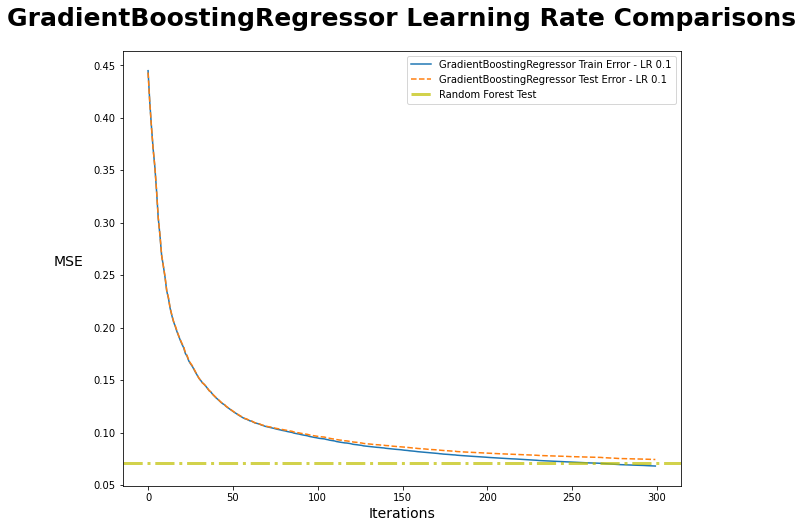

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
stage_score_plot(gdbr, ax, X_train, y_train, X_test, y_test)
rf_score_plot(rf, X_train, y_train, X_test, y_test)
plt.legend();

In [46]:
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array

        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best


In [47]:
def display_default_and_gsearch_model_results(model_default, model_gridsearch, 
                                              X_test, y_test):
    '''
        Parameters: model_default: fit model using initial parameters
                    model_gridsearch: fit model using parameters from gridsearch
                    X_test: 2d numpy array
                    y_test: 1d numpy array
        Return: None, but prints out mse and r2 for the default and model with
                gridsearched parameters
    '''
    name = model_default.__class__.__name__.replace('Regressor', '') # for printing
    y_test_pred = model_gridsearch.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("Results for {0}".format(name))
    print("Gridsearched model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))
    y_test_pred = model_default.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("     Default model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))

In [50]:
# fix learning rate and n_estimators firstly, search for other parameters
from sklearn.model_selection import GridSearchCV

gradient_boosting_grid = {'learning_rate': [0.1],
                          'max_depth': [3,4,5,6],
                          'max_features': [1.0, 0.5, 0.3, 0.1],
                          'n_estimators': [300]}

gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           X_train, y_train)

print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(X_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.1      | [0.1]
max_depth            | 6        | [3, 4, 5, 6]
max_features         | 0.5      | [1.0, 0.5, 0.3, 0.1]
n_estimators         | 300      | [300]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 0.060 | r2: 0.874
     Default model mse: 0.074 | r2: 0.845


In [51]:
# take the above result and search optimal parameters for learning rate and n_estimators
gradient_boosting_grid = {'learning_rate': [0.4, 0.2, 0.1, 0.05, 0.01],
                          'max_depth': [6],
                          'max_features': [0.5],
                          'n_estimators': [200, 400, 600, 700, 800, 900]}

gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           X_train, y_train)

print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(X_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.05     | [0.4, 0.2, 0.1, 0.05, 0.01]
max_depth            | 6        | [6]
max_features         | 0.5      | [0.5]
n_estimators         | 900      | [200, 400, 600, 700, 800, 900]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 0.058 | r2: 0.878
     Default model mse: 0.074 | r2: 0.845


In [52]:
gdbr_opt = GradientBoostingRegressor(learning_rate= 0.05,
                                    loss='ls',
                                    max_depth = 6, 
                                    max_features= 0.5,
                                    random_state=1,
                                    n_estimators=900,)

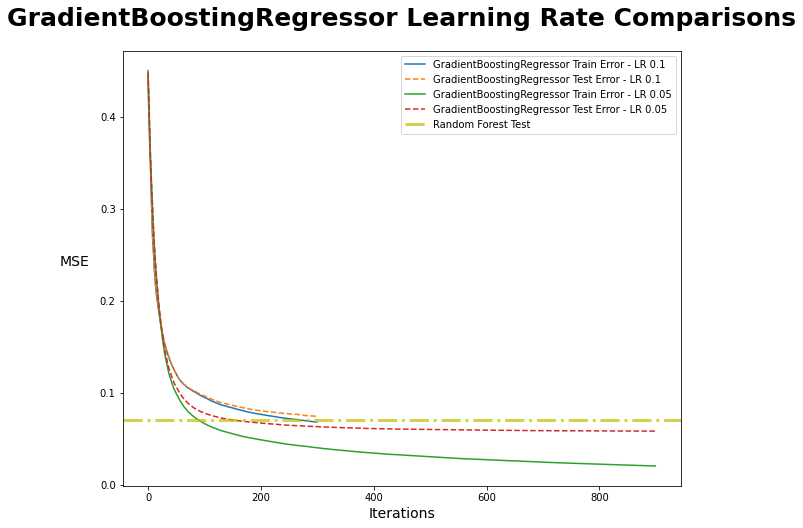

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
stage_score_plot(gdbr, ax, X_train, y_train, X_test, y_test)
stage_score_plot(gdbr_opt, ax, X_train, y_train, X_test, y_test)
rf_score_plot(rf, X_train, y_train, X_test, y_test)
plt.legend();

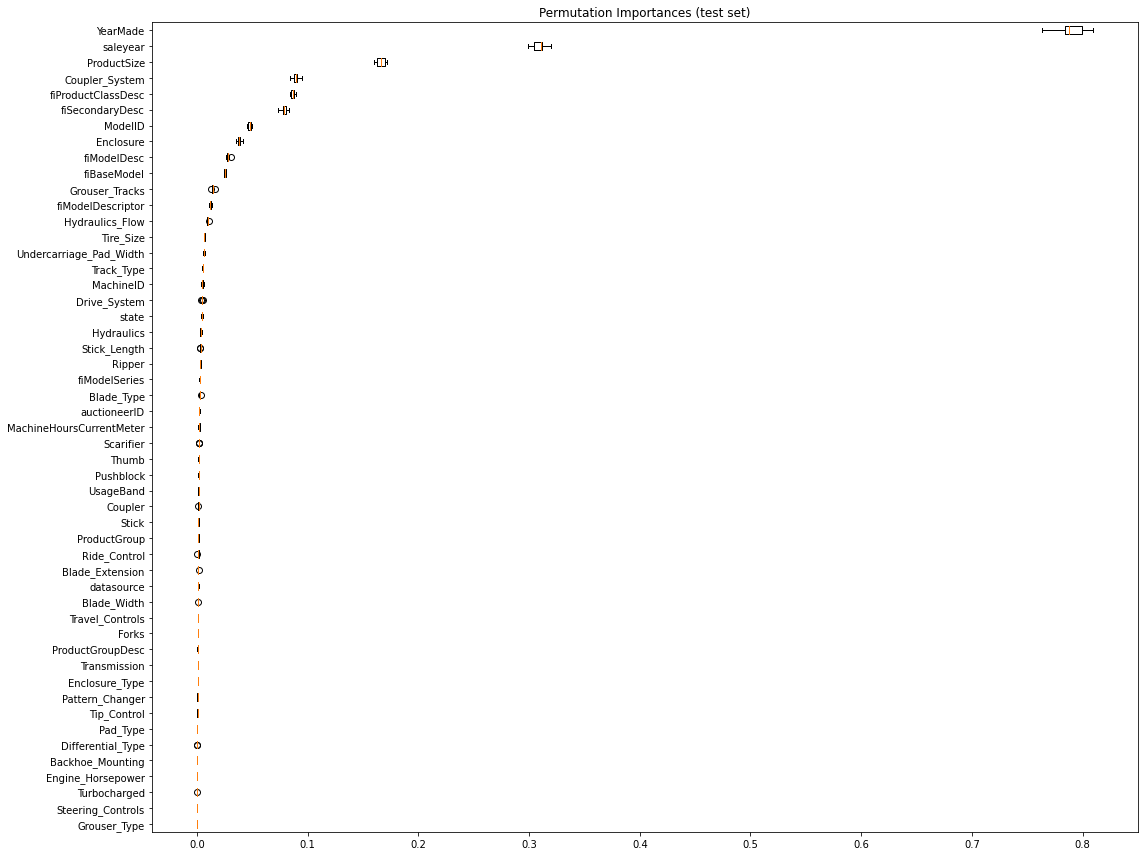

In [116]:
result = permutation_importance(gdbr_opt, X_test, y_test, n_repeats=10,
                                random_state=1, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(16,12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()


In [55]:
y_pred = gdbr_opt.predict(X_test)
y_pred_exp = np.exp(y_pred)
y_pred_exp

array([22005.24135127,  9194.93842244, 25368.83702965, ...,
       21043.61614002, 10262.34395002, 19243.95032397])

In [56]:
y_test_exp = np.exp(y_test)
y_test_exp

125021     19500.0
360856      9500.0
330987     25000.0
1176      100000.0
290129     21000.0
            ...   
131732    100000.0
285381     14000.0
77429      18000.0
280876     10500.0
217084     19500.0
Name: SalePrice, Length: 5014, dtype: float64

In [57]:
r2_score(y_test, y_pred)

0.8784035297985473

In [58]:
mse = mean_squared_error(y_test, y_pred)
mse

0.058216146839105566

In [59]:
rmse = mse**(1/2)
rmse

0.2412802247162116

because we take log of the original sale prices, this rmse is actually rmsle. We can prove this below. 

In [60]:
msle = mean_squared_log_error(y_test_exp, y_pred_exp)
msle

0.05821013287138266

In [61]:
rmsle = msle**(1/2)
rmsle

0.24126776177389025

The best RMSLE for the competition was 0.23. Can we improve this by StandardScaler the features??? 

In [93]:
valid = pd.read_csv('data/Valid.zip')
valid

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,3/7/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,1/28/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11571,6333348,1794518,21435

In [94]:
# trim YearMade
valid.YearMade.clip(1900,2020,inplace=True)

In [95]:
# convert saledate to saleyear
valid['saleyear'] = pd.to_datetime(valid['saledate']).dt.year
valid.drop('saledate', axis = 1, inplace = True)


In [96]:
# Converting strings to categories
for label, content in valid.items():
    if pd.api.types.is_string_dtype(content):
        valid[label] = content.astype('category').cat.as_unordered()


In [97]:
# Check for which numeric columns have null values
for label, content in valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


MachineHoursCurrentMeter


In [98]:
# Check the numeric columns and fill with median or mean
for label, content in valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill the missing values with median, I will use mean()
            valid[label] = content.fillna(content.mean())


In [99]:
# Turn the categorical variables into numbers
for label, content in valid.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add +1 because pandas encodes the missing categories as -1
        valid[label] = pd.Categorical(content).codes + 1


In [100]:
valid

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
0,1222837,902859,1376,121,3,1900,0.00000,0,294,122,0,0,28,3,23,15,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
1,1222839,1048320,36526,121,3,2006,4412.00000,3,1612,728,32,34,0,3,15,6,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,2,16,7,3,3,1,0,0,0,0,0,2012
2,1222841,999308,4587,121,3,2000,10127.00000,3,161,75,0,0,29,3,14,6,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,7,3,2,1,0,0,0,0,0,2012
3,1222843,1062425,1954,121,3,1900,4682.00000,2,687,248,16,0,29,3,15,6,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
4,1222845,1032841,4701,121,3,2002,8150.00000,3,398,156,24,0,0,0,53,8,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,5482.14138,0,196,83,45,0,0,5,12,42,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
11569,6333345,1882122,21436,149,2,2005,5482.14138,0,197,83,45,34,0,5,16,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
11570,6333347,1944213,21435,149,2,2005,5482.14138,0,196,83,45,0,0,5,12,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,16,21,3,2,1,0,0,0,0,0,2012
11571,6333348,1794518,21435,149,2,2006,5482.14138,0,196,83,45,0,0,5,12,42,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,16,21,3,2,1,0,0,0,0,0,2012


In [101]:
valid.drop('SalesID', axis=1, inplace=True)

In [102]:
# check if cleaned data still have nan
valid.isna().sum()


MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier                   0
Tip_Contro

In [103]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MachineID                 11573 non-null  int64  
 1   ModelID                   11573 non-null  int64  
 2   datasource                11573 non-null  int64  
 3   auctioneerID              11573 non-null  int64  
 4   YearMade                  11573 non-null  int64  
 5   MachineHoursCurrentMeter  11573 non-null  float64
 6   UsageBand                 11573 non-null  int8   
 7   fiModelDesc               11573 non-null  int16  
 8   fiBaseModel               11573 non-null  int16  
 9   fiSecondaryDesc           11573 non-null  int8   
 10  fiModelSeries             11573 non-null  int8   
 11  fiModelDescriptor         11573 non-null  int8   
 12  ProductSize               11573 non-null  int8   
 13  fiProductClassDesc        11573 non-null  int8   
 14  state 

In [104]:
valid

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
0,902859,1376,121,3,1900,0.00000,0,294,122,0,0,28,3,23,15,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
1,1048320,36526,121,3,2006,4412.00000,3,1612,728,32,34,0,3,15,6,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,2,16,7,3,3,1,0,0,0,0,0,2012
2,999308,4587,121,3,2000,10127.00000,3,161,75,0,0,29,3,14,6,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,7,3,2,1,0,0,0,0,0,2012
3,1062425,1954,121,3,1900,4682.00000,2,687,248,16,0,29,3,15,6,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
4,1032841,4701,121,3,2002,8150.00000,3,398,156,24,0,0,0,53,8,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,1919201,21435,149,2,2005,5482.14138,0,196,83,45,0,0,5,12,42,4,4,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
11569,1882122,21436,149,2,2005,5482.14138,0,197,83,45,34,0,5,16,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,2012
11570,1944213,21435,149,2,2005,5482.14138,0,196,83,45,0,0,5,12,8,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,16,21,3,2,1,0,0,0,0,0,2012
11571,1794518,21435,149,2,2006,5482.14138,0,196,83,45,0,0,5,12,42,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,16,21,3,2,1,0,0,0,0,0,2012


In [105]:
valid_test = pd.read_csv('data/ValidSolution.csv')
valid_test

,SalesID,SalePrice,Usage
0,1222837,31000.0,PublicTest
1,1222839,54000.0,PublicTest
2,1222841,26500.0,PublicTest
3,1222843,10000.0,PublicTest
4,1222845,35000.0,PublicTest
...,...,...,...
11568,6333344,10000.0,PublicTest
11569,6333345,10500.0,PublicTest
11570,6333347,12500.0,PublicTest
11571,6333348,10000.0,PublicTest


In [106]:
valid_pred = gdbr_opt.predict(valid)
valid_pred_exp = np.exp(valid_pred)
valid_pred_exp



array([23918.83017094, 58864.87730872, 28851.03270241, ...,
        9699.38657562, 12138.01586591, 13064.69892671])

In [109]:
msle = mean_squared_log_error(valid_test['SalePrice'], valid_pred_exp)
msle

0.1534113555565335

In [110]:
rmsle = msle**(1/2)
rmsle

0.39167761686945235